# **Homework Four**


•	(Ungraded, but as always, completion still counts!) DataCamp Data Ingestion & inspection, and Exploratory data analysis

•	(Ungraded) Reading Vanderplas Chapters 2 & 3 (https://jakevdp.github.io/PythonDataScienceHandbook/)

•	(Graded) Pandas data problems below

NOTE: YOU WILL SUBMIT THIS HW AS A IPYNB FILE AND AS A PDF. FIRST, PRINT IT TO PDF DISPLAYING YOUR GRAPH AND SUBMIT TO **HOMEWORK 4 PDF**. THEN COMMENT OUT THE GRAPH CODE AND SUBMIT IT AS A IPYNB FILE TO **HOMEWORK 4**. THE LATTER IS AUTOGRADED.

# Pandas exercises

a) Use the bmore.csv dataset for this homework. The dataset contains poverty and crime statistics about neighborhoods in Baltimore, MD. Make sure your output does not display errors. Import the data into a DataFrame and describe the data.

In [3]:
import pandas as pd
import os

file_path = os.getenv("ROOT_PATH", "./") + 'bmore.csv' #When you submit the hw, make sure the path stays like this
#Your code, read in the csv file
data = pd.read_csv("bmore.csv") 
#data.head()

,CSA,Population,Median_Income,Unemployed,Families_in_Poverty,Bachelors_degree,Juvenile_Arrest_Rate,Homicide_Incidence_Rate,Life_Expectancy,Top_causes_of_death
0,Allendale/Irvington/S. Hilton,16217,33112,0.15,0.15,0.09,127.6,22.2,68.5,"Heart Disease, Cancer, Stroke, Homicide"
1,Beechfield/Ten Hills/West Hills,12137,47730,0.09,0.12,0.20,66.8,8.2,72.7,"Heart Disease, Cancer, Stroke, Homicide"
2,Belair-Edison,17430,43769,0.14,0.09,0.63,98.2,24.1,70.9,"Heart Disease, Cancer, Homicide, Stroke"
3,Brooklyn/Curtis Bay/Hawkins Point,14243,32296,0.10,0.20,0.06,97.6,26.0,69.6,"Heart Disease, Cancer, Respiratory Disease, Dr..."
4,Canton,8100,77222,0.03,0.02,0.59,179.3,2.5,76.9,"Heart Disease, Cancer, Respiratory Disease, St..."


b) Create methods to report summary statistics (e.g., mean, median, and standard deviations) using pandas Dataframe methods. Replace "raise NotImplementedError". Test a few to examine the data. 

In [20]:
def get_mean(df, column_name):
    return df[column_name].mean() #EXAMPLE

def get_stddev(df, column_name):
    return df[column_name].std()


def get_median(df, column_name): 
    return df[column_name].median()

def get_columns(df):
    return df.columns

#get_mean(data, 'Population')

#get_stddev(data, 'Population')

#get_median(data, 'Population')

#get_columns(data)

Index(['CSA', 'Population', 'Median_Income', 'Unemployed',
       'Families_in_Poverty', 'Bachelors_degree', 'Juvenile_Arrest_Rate',
       'Homicide_Incidence_Rate', 'Life_Expectancy', 'Top_causes_of_death'],
      dtype='object')

c) Write a method that computes mean statistics on any variable where the unemployment rate is greater than **x** percent. 

In [68]:
def get_meanX(df, column_name, x):
    df_sub = df[ df[column_name] > x ]
    return df_sub[column_name].mean() 
#- 0.18218432510884952

#get_meanX(data, 'Homicide_Incidence_Rate', 2)

0.18218432510884952

d) Write a method that groups the data by one or more categorical variables (e.g. CSA or Top_Causes_Death), and computers mean statistics for one variable in the dataframe.

In [93]:
def get_meanG(df, column_list, variable):
    df_g = df.groupby(column_list)
    df_gg = df_g[variable]
    return df_gg.mean()
#get_meanG(data, ['CSA','Top_causes_of_death'], 'Population')
#get_meanG(data, ['Top_causes_of_death'], 'Population')
#get_meanG(data, ['CSA'], 'Population')
#get_meanG(data, ['Top_causes_of_death','CSA'], 'Population')
#type(data.groupby(['CSA'])[['Population']].mean())
#df_g = data.groupby(['CSA'])[['Population']]
#data['Population'].dtype
#data['Top_causes_of_death'].dtype
#data.groupby(['CSA'])

e) Make a scatterplot of Median Income and Bachelors degree. The latter variable measures the
percentage of the population in the county that has a bachelors degree.

Text(0, 0.5, 'Bachelors_degree')

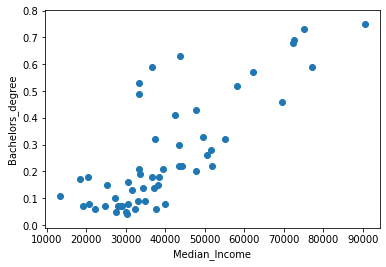

In [49]:
#import matplotlib.pyplot as plt
# Show graphs within the Python notebook
# YOU MUST REMOVE ALL REFERENCES TO MATPLOTLIB BEFORE SUBMITTING
#%matplotlib inline
# Your code here
#plt.scatter(data['Median_Income'], data['Bachelors_degree'])
#plt.xlabel('Median_Income')
#plt.ylabel('Bachelors_degree')

f) Run a regression model of the following form:
Report a table with all coefficient estimates including p-values.

$$\textrm{Juvenile_Arrest_Rate} = 
\beta_0 + \beta_1\textrm{Population} + \beta_2\textrm{Median_Income} + \beta_3\textrm{Unemployment} + \beta4\textrm{Education} + \beta_5\textrm{Poverty} + \epsilon $$

In [60]:
# Using StatsModels "ols", create a model named 'lm' that
# maps Juvenile_Arrest_Rate as the dependent variable as a function of
# Population, Median_Income, Unemployed, Bachelors_degree, and Families_in_Poverty

# Your model will be tested assuming its name is "lm" so do not change the variable name

# The model should have all of the typical attributes expected of a
# statsmodels.regression.linear_model.RegressionResults, such as params and pvalues

# Examine the various parameters and pvalues yourself to see how good of a fit the model is

# Fill in the methods below based on statsmodels methods that in the regression results for the model


import statsmodels.formula.api as smf
lm = smf.ols(formula='Juvenile_Arrest_Rate ~ Population + Median_Income + Unemployed + Bachelors_degree + Families_in_Poverty', data=data).fit()


def param_coefficients(linear_model_regression_results):
    return linear_model_regression_results.params #EXAMPLE


def p_values(linear_model_regression_results):
    return linear_model_regression_results.pvalues


def intercept(linear_model_regression_results):
    return linear_model_regression_results.params.Intercept


def standard_errors(linear_model_regression_results):
    return linear_model_regression_results.bse
#print(lm.summary())

TypeError: exceptions must derive from BaseException

g) Interpret the coefficient on median income.
For a $1 increase in city wide median income we expect the juvenile arrest rate to decrease by .0054 points holding all other variables constant.

1) A \$1 dollar increase in median income is correlated with how much of a decrease in the incarceration rate? 

2) What about a \$1,000 increase?


Make your answers in terms of two significant digits

In [57]:
answer_1 = .0054
answer_2 = 5.4

5.4